# Heart Disease Prediction

## Import Basic Libraries for Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from functools import reduce 

import warnings
warnings.filterwarnings('ignore')

## Import Data and Building a Data Pipeline

The data was downloaded from Kaggle via the following link: 
https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv

In [2]:
df = pd.read_csv("/Users/bryanyu1/Documents/Out of School/Side Projects/Python/Heart Disease Prediction/heart.csv")

In [3]:
df.shape

(918, 12)

In [4]:
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [5]:
df.isnull().values.any()

False

Change all categorical variables to binary/indicator variables 

In [6]:
df2 = df
df2.columns = df.columns

binary_map = {'M' : 1, 'F' : 0, 
              'Y' : 1, 'N' : 0, 
              'T' : 1, 'F' : 0, 
              True : 1, False : 0}

df2['Sex'] = df2['Sex'].map(binary_map)

df2['ExerciseAngina'] = df2['ExerciseAngina'].map(binary_map)

df2['i_ChestPainType_ASY'] = (df2['ChestPainType'] == 'ASY')
df2['i_ChestPainType_ASY'] = df2['i_ChestPainType_ASY'].map(binary_map)
df2['i_ChestPainType_NAP'] = (df2['ChestPainType'] == 'NAP')
df2['i_ChestPainType_NAP'] = df2['i_ChestPainType_NAP'].map(binary_map)
df2['i_ChestPainType_ATA'] = (df2['ChestPainType'] == 'ATA')
df2['i_ChestPainType_ATA'] = df2['i_ChestPainType_ATA'].map(binary_map)
df2['i_ChestPainType_TA'] = (df2['ChestPainType'] == 'TA')
df2['i_ChestPainType_TA'] = df2['i_ChestPainType_TA'].map(binary_map)
del df2['ChestPainType'] 

df2['i_RestingECG_Normal'] = (df2['RestingECG'] == 'Normal')
df2['i_RestingECG_Normal'] = df2['i_RestingECG_Normal'].map(binary_map)
df2['i_RestingECG_LVH'] = (df2['RestingECG'] == 'LVH')
df2['i_RestingECG_LVH'] = df2['i_RestingECG_LVH'].map(binary_map)
df2['i_RestingECG_ST'] = (df2['RestingECG'] == 'ST')
df2['i_RestingECG_ST'] = df2['i_RestingECG_ST'].map(binary_map)
del df2['RestingECG'] 

df2['i_ST_Slope_Up'] = (df2['ST_Slope'] == 'Up')
df2['i_ST_Slope_Up'] = df2['i_ST_Slope_Up'].map(binary_map)
df2['i_ST_Slope_Down'] = (df2['ST_Slope'] == 'Down')
df2['i_ST_Slope_Down'] = df2['i_ST_Slope_Down'].map(binary_map)
df2['i_ST_Slope_Flat'] = (df2['ST_Slope'] == 'Flat')
df2['i_ST_Slope_Flat'] = df2['i_ST_Slope_Flat'].map(binary_map)
del df2['ST_Slope'] 

df2.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,i_ChestPainType_ASY,i_ChestPainType_NAP,i_ChestPainType_ATA,i_ChestPainType_TA,i_RestingECG_Normal,i_RestingECG_LVH,i_RestingECG_ST,i_ST_Slope_Up,i_ST_Slope_Down,i_ST_Slope_Flat
0,40,1,140,289,0,172,0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,1,0,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,0,0,1,0,0,0,1,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,1,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,1,0,0


Check for Correlation and Multicollinearity

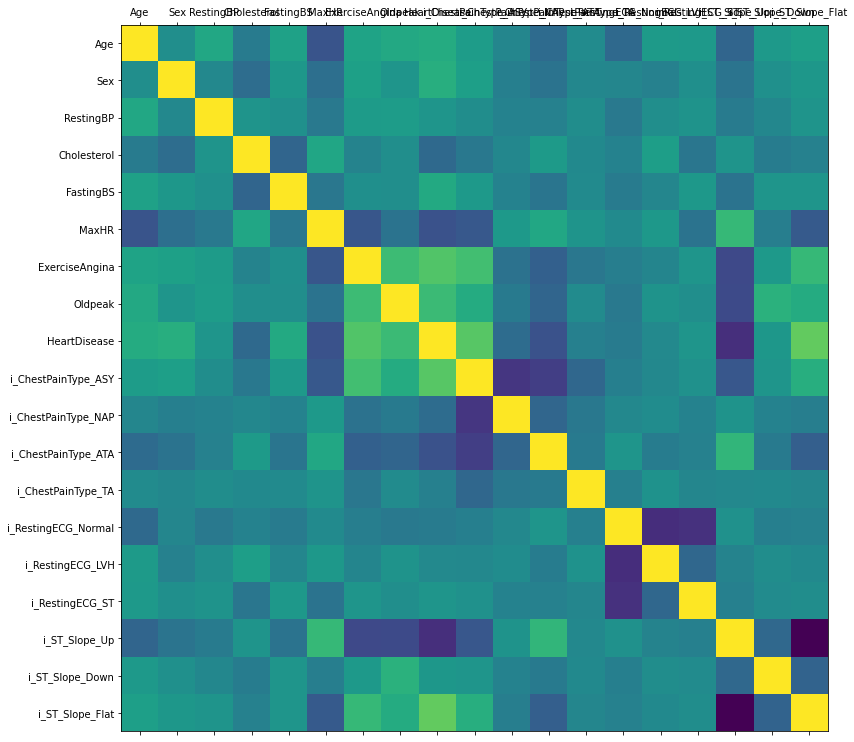

In [7]:
def plot_corr(df, size=13):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(df2)

<AxesSubplot:>

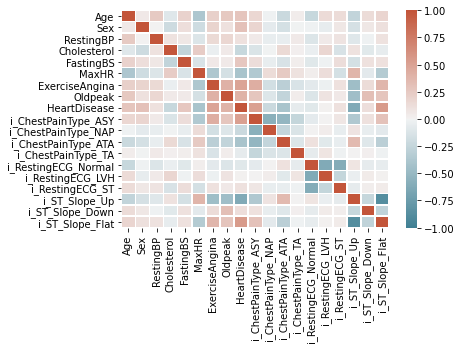

In [8]:
sns.heatmap(df2.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), vmin=-1, vmax=1, linewidths=.5)

In [9]:
df2.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,i_ChestPainType_ASY,i_ChestPainType_NAP,i_ChestPainType_ATA,i_ChestPainType_TA,i_RestingECG_Normal,i_RestingECG_LVH,i_RestingECG_ST,i_ST_Slope_Up,i_ST_Slope_Down,i_ST_Slope_Flat
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.282039,0.166607,-0.011335,-0.218165,0.032042,-0.230566,0.145727,0.136798,-0.258067,0.138397,0.185568
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.190664,0.105734,0.305445,0.183876,-0.066486,-0.161522,-0.004031,-0.010634,-0.049518,0.063715,-0.150942,0.066036,0.116077
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.107589,0.048824,-0.041348,-0.046153,0.049855,-0.116851,0.053166,0.090447,-0.096146,-0.007912,0.099207
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.232741,-0.120531,-0.006634,0.150954,0.017365,-0.038470,0.177077,-0.133106,0.094027,-0.083371,-0.050953
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.267291,0.131176,-0.039249,-0.140514,0.026885,-0.093028,-0.011656,0.127110,-0.161730,0.105102,0.107006
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.400421,-0.354963,0.134580,0.253735,0.100025,0.023801,0.125793,-0.157879,0.383397,-0.073316,-0.342581
ExerciseAngina,0.215793,0.190664,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.494282,0.430034,-0.166030,-0.300365,-0.128105,-0.072924,-0.016382,0.107036,-0.455676,0.136439,0.382237
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.403951,0.280026,-0.106212,-0.262124,0.032231,-0.116719,0.086794,0.055958,-0.450577,0.322130,0.283295
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,1.000000,0.516716,-0.212964,-0.401924,-0.054790,-0.091580,0.010670,0.102527,-0.622164,0.122527,0.554134
i_ChestPainType_ASY,0.166607,0.183876,0.048824,-0.120531,0.131176,-0.354963,0.430034,0.280026,0.516716,1.000000,-0.577670,-0.522432,-0.249003,-0.063606,0.002289,0.076438,-0.359443,0.103407,0.303645


Variables i_ST_Slope_Up or i_ST_Slope_Flat are highly negatively correlated. Remove one of the variables. 

In [10]:
del df2['i_ST_Slope_Flat']

Check number of true heart disease cases

In [11]:
num_obs = len(df2)
num_true = len(df2.loc[df2['HeartDisease'] == 1])
num_false = len(df2.loc[df2['HeartDisease'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  508 (55.34%)
Number of False cases: 410 (44.66%)


## Modelling

Import libraries for modelling and testing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error, precision_score, accuracy_score
from sklearn import metrics

In [13]:
target = df2['HeartDisease']
df2 = df2.drop(columns = 'HeartDisease')

Scale the data

In [14]:
# sc = StandardScaler()
sc = MinMaxScaler()
sc.fit(df2)
df_transformed = pd.DataFrame(sc.fit_transform(df2))
df_transformed.columns = df2.columns
df_transformed['HeartDisease'] = target
df_transformed.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,i_ChestPainType_ASY,i_ChestPainType_NAP,i_ChestPainType_ATA,i_ChestPainType_TA,i_RestingECG_Normal,i_RestingECG_LVH,i_RestingECG_ST,i_ST_Slope_Up,i_ST_Slope_Down,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.661983,0.329684,0.233115,0.540911,0.404139,0.396291,0.540305,0.221133,0.188453,0.050109,0.601307,0.204793,0.193900,0.430283,0.068627,0.553377
std,0.192502,0.407701,0.092571,0.181400,0.423046,0.179298,0.490992,0.121201,0.498645,0.415236,0.391287,0.218289,0.489896,0.403770,0.395567,0.495386,0.252957,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.600000,0.287313,0.000000,0.422535,0.000000,0.295455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,1.000000,0.650000,0.369818,0.000000,0.549296,0.000000,0.363636,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.653061,1.000000,0.700000,0.442786,0.000000,0.676056,1.000000,0.465909,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split the data into training and testing datasets

In [15]:
feature_col_names = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
                     'ExerciseAngina', 'Oldpeak', 'i_ChestPainType_ASY', 'i_ChestPainType_NAP',
                     'i_ChestPainType_ATA', 'i_ChestPainType_TA', 'i_RestingECG_Normal',
                     'i_RestingECG_LVH', 'i_RestingECG_ST', 'i_ST_Slope_Up', 'i_ST_Slope_Down']
predicted_class_names = ['HeartDisease']

X = df_transformed[feature_col_names].values
y = df_transformed[predicted_class_names].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234) 

print("{0:0.2f}% in training set".format((len(X_train)/len(df_transformed.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_transformed.index)) * 100))

print("Original True  : {0} ({1:0.2f}%)".format(len(df_transformed.loc[df_transformed['HeartDisease'] == 1]), 
                                                (len(df_transformed.loc[df_transformed['HeartDisease'] == 1])/len(df_transformed.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df_transformed.loc[df_transformed['HeartDisease'] == 0]), 
                                                (len(df_transformed.loc[df_transformed['HeartDisease'] == 0])/len(df_transformed.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 
                                                (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 
                                                (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 
                                                (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 
                                                (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

69.93% in training set
30.07% in test set
Original True  : 508 (55.34%)
Original False : 410 (44.66%)

Training True  : 353 (54.98%)
Training False : 289 (45.02%)

Test True      : 155 (56.16%)
Test False     : 121 (43.84%)


### Naive Bayes 

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

Performance on Training Data

In [17]:
nb_predict_train = nb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, nb_predict_train)))
print("")
print("Confusion Matrix")
print("{0}".format(confusion_matrix(y_train, nb_predict_train)))
print("")
print("Classification Report")
print(classification_report(y_train, nb_predict_train))

Accuracy: 0.8427

Confusion Matrix
[[237  52]
 [ 49 304]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       289
           1       0.85      0.86      0.86       353

    accuracy                           0.84       642
   macro avg       0.84      0.84      0.84       642
weighted avg       0.84      0.84      0.84       642



Performance on Testing Data

In [18]:
nb_predict_test = nb_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, nb_predict_test)))
print("")
print("Confusion Matrix")
print("{0}".format(confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(classification_report(y_test, nb_predict_test))

Accuracy: 0.8587

Confusion Matrix
[[102  19]
 [ 20 135]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       121
           1       0.88      0.87      0.87       155

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=15, max_features=6)
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(max_features=6, n_estimators=15, random_state=42)

Performance on Training Data

In [20]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, rf_predict_train)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, rf_predict_train))
print("")
print("Classification Report")
print(classification_report(y_train, rf_predict_train))

Accuracy: 0.9969

Confusion Matrix
[[287   2]
 [  0 353]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       289
           1       0.99      1.00      1.00       353

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



Performance on Testing Data

In [21]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, rf_predict_test)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(classification_report(y_test, rf_predict_test))

Accuracy: 0.8986

Confusion Matrix
[[104  17]
 [ 11 144]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       121
           1       0.89      0.93      0.91       155

    accuracy                           0.90       276
   macro avg       0.90      0.89      0.90       276
weighted avg       0.90      0.90      0.90       276



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, random_state=42, solver='liblinear')

Performance on Training Data

In [23]:
lr_predict_train = lr_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, lr_predict_train)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, lr_predict_train))
print("")
print("Classification Report")
print(classification_report(y_train, lr_predict_train))

Accuracy: 0.8536

Confusion Matrix
[[236  53]
 [ 41 312]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       289
           1       0.85      0.88      0.87       353

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



Performance on Testing Data

In [24]:
lr_predict_test = lr_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, lr_predict_test)))
print(confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(classification_report(y_test, lr_predict_test))

Accuracy: 0.8913
[[104  17]
 [ 13 142]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       121
           1       0.89      0.92      0.90       155

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



Setting Regularization Parameter

1st max value of 0.923 occured at C=0.300


Text(0, 0.5, 'recall score')

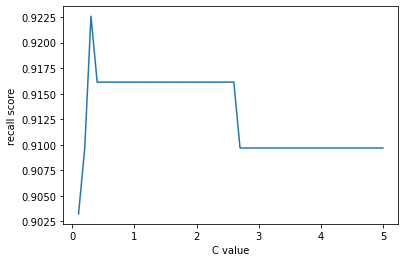

In [25]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, solver='liblinear', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Logisitic regression with class_weight = 'balanced'

1st max value of 0.910 occured at C=4.500


Text(0, 0.5, 'recall score')

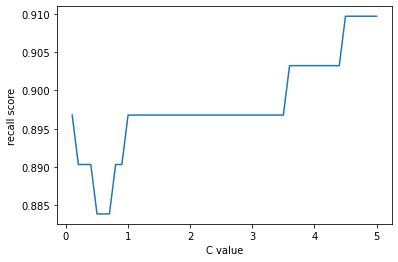

In [26]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", solver='liblinear', random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [27]:
lr_model = LogisticRegression( class_weight="balanced", C=best_score_C_val, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=4.5, class_weight='balanced', random_state=42,
                   solver='liblinear')

Performance on Training Data

In [28]:
lr_predict_train2 = lr_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, lr_predict_train2)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, lr_predict_train2))
print("")
print("Classification Report")
print(classification_report(y_train, lr_predict_train2))
print(metrics.recall_score(y_train, lr_predict_train2))

Accuracy: 0.8505

Confusion Matrix
[[242  47]
 [ 49 304]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       289
           1       0.87      0.86      0.86       353

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642

0.8611898016997167


Performance on Testing Data

In [29]:
lr_predict_test2 = lr_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, lr_predict_test2)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, lr_predict_test2))
print("")
print("Classification Report")
print(classification_report(y_test, lr_predict_test2))
print(metrics.recall_score(y_test, lr_predict_test2))

Accuracy: 0.8986

Confusion Matrix
[[107  14]
 [ 14 141]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       121
           1       0.91      0.91      0.91       155

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

0.9096774193548387


### Logistic Regression CV

In [30]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, solver='liblinear', random_state=42, Cs=3, 
                                   cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False, solver='liblinear')

Performance on Training Data

In [31]:
lr_cv_predict_train = lr_cv_model.predict(X_train)
print("Accuracy: {0:.4f}".format(accuracy_score(y_train, lr_cv_predict_train)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_train, lr_cv_predict_train))
print("")
print("Classification Report")
print(classification_report(y_train, lr_cv_predict_train))

Accuracy: 0.8489

Confusion Matrix
[[241  48]
 [ 49 304]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       289
           1       0.86      0.86      0.86       353

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



Performance on Testing Data

In [32]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, lr_cv_predict_test)))
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, lr_cv_predict_test))
print("")
print("Classification Report")
print(classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.8913

Confusion Matrix
[[107  14]
 [ 16 139]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       121
           1       0.91      0.90      0.90       155

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



### XGBoost

In [33]:
import xgboost as xgb
from xgboost import XGBClassifier

In [34]:
xgb_classmodel = XGBClassifier(objective = 'binary:logistic',
                               max_depth = 5,
                               max_delta_step = 0.1,
                               gamma = 0.6)
xgb_model = xgb_classmodel.fit(X_train, y_train)

[17:32:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Performance on Training Data

In [35]:
predictions_train = xgb_model.predict(X_train)
logit_auc_roc_train = roc_auc_score(y_train, predictions_train)
cm_train = confusion_matrix(y_train, predictions_train)
print('AUC %.6f' % logit_auc_roc_train)
print("")
print('Confusion matrix:\n {}\n'.format(cm_train))
print("Classification Report")
print(classification_report(y_train, predictions_train))

AUC 0.907971

Confusion matrix:
 [[253  36]
 [ 21 332]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       289
           1       0.90      0.94      0.92       353

    accuracy                           0.91       642
   macro avg       0.91      0.91      0.91       642
weighted avg       0.91      0.91      0.91       642



Performance on Testing Data

In [36]:
predictions = xgb_model.predict(X_test)
logit_auc_roc = roc_auc_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
print('AUC %.6f' % logit_auc_roc)
print("")
print('Confusion matrix:\n {}\n'.format(cm))
print("Classification Report")
print(classification_report(y_test, predictions))

AUC 0.897494

Confusion matrix:
 [[104  17]
 [ 10 145]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       121
           1       0.90      0.94      0.91       155

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



### LightGBM

In [37]:
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
# converting the dataset into proper LGB format 
d_train = lgb.Dataset(X_train, label = y_train)

# Specifying the parameter
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'

# train the model 
clf = lgb.train(params, d_train, 200)

[LightGBM] [Info] Number of positive: 353, number of negative: 289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549844 -> initscore=0.200041
[LightGBM] [Info] Start training from score 0.200041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Performance on Training Data

In [39]:
# prediction on the train set
y_pred_train = clf.predict(X_train)

# rounding the values
y_pred_train = y_pred_train.round(0)

# converting from float to integer
y_pred_train = y_pred_train.astype(int)

# roc_auc_score metric
lgbm_auc_roc_train = roc_auc_score(y_pred_train, y_train)
lgbm_cm_train = confusion_matrix(y_train, y_pred_train)
print('AUC %.6f' % lgbm_auc_roc_train)
print("")
print('Confusion matrix:\n {}\n'.format(lgbm_cm_train))
print("Classification Report")
print(classification_report(y_train, y_pred_train))

AUC 0.907348

Confusion matrix:
 [[249  40]
 [ 21 332]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       289
           1       0.89      0.94      0.92       353

    accuracy                           0.90       642
   macro avg       0.91      0.90      0.90       642
weighted avg       0.91      0.90      0.90       642



Performance on Testing Data

In [40]:
# prediction on the test set
y_pred = clf.predict(X_test)

# rounding the values
y_pred = y_pred.round(0)

# converting from float to integer
y_pred = y_pred.astype(int)

# roc_auc_score metric
lgbm_auc_roc = roc_auc_score(y_pred, y_test)
lgbm_cm = confusion_matrix(y_test, y_pred)
print('AUC %.6f' % lgbm_auc_roc)
print("")
print('Confusion matrix:\n {}\n'.format(lgbm_cm))
print("Classification Report")
print(classification_report(y_test, y_pred))

AUC 0.904943

Confusion matrix:
 [[103  18]
 [  9 146]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       121
           1       0.89      0.94      0.92       155

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

